# **Import the needed Libraries and Modules**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("/content/Super_Store_data.csv", encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


# **1- Data Preprocessing:-**

In [3]:
#Drop non informative col in the data
columns_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
3,6/9/2014,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
4,6/9/2014,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092


In [4]:
#Convert date columns from string to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
3,2014-06-09,2014-06-14,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
4,2014-06-09,2014-06-14,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092


In [5]:
# Extract year and month from order date
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

In [6]:
#feauter engineer by Calculate shipping duration and drop original cols
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df.drop(columns=['Order Date', 'Ship Date'], inplace=True)

In [7]:
#Ecoding the catigorical data
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [8]:
print(df.isnull().sum())

Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
Order Year       0
Order Month      0
Shipping Days    0
dtype: int64


In [9]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 1


In [10]:
df.drop_duplicates(inplace=True)

In [52]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [53]:
print(f"Final shape: {df.shape}")
print(df.head())

Final shape: (2120, 16)
   Ship Mode   Segment  Country      City     State  Postal Code    Region  \
0  -0.203147 -0.855104      0.0  0.090866  0.609512          0.0  0.345650   
1  -0.203147 -0.855104      0.0  0.090866  0.609512          0.0  0.345650   
2   0.705444 -0.855104      0.0  0.090866  0.609512          0.0  0.345650   
3   0.705444 -0.855104      0.0  0.090866 -1.553471          0.0  1.202701   
4   0.705444 -0.855104      0.0  0.090866 -1.553471          0.0  1.202701   

   Category  Sub-Category     Sales  Quantity  Discount    Profit  Order Year  \
0       0.0     -1.905541  0.146435 -0.852755 -0.957784  0.901562         0.0   
1       0.0     -0.747025  0.146435 -0.348194 -0.957784  0.901562         0.0   
2       0.0      1.570008  0.146435  0.660927  1.521192 -1.252827         0.0   
3       0.0      0.411492  0.146435  1.670048 -0.957784  0.901562         0.0   
4       0.0      1.570008  0.146435  2.174609  0.143983  0.901562         0.0   

   Order Month  Ship

# **2- EDA Tchniques:-**

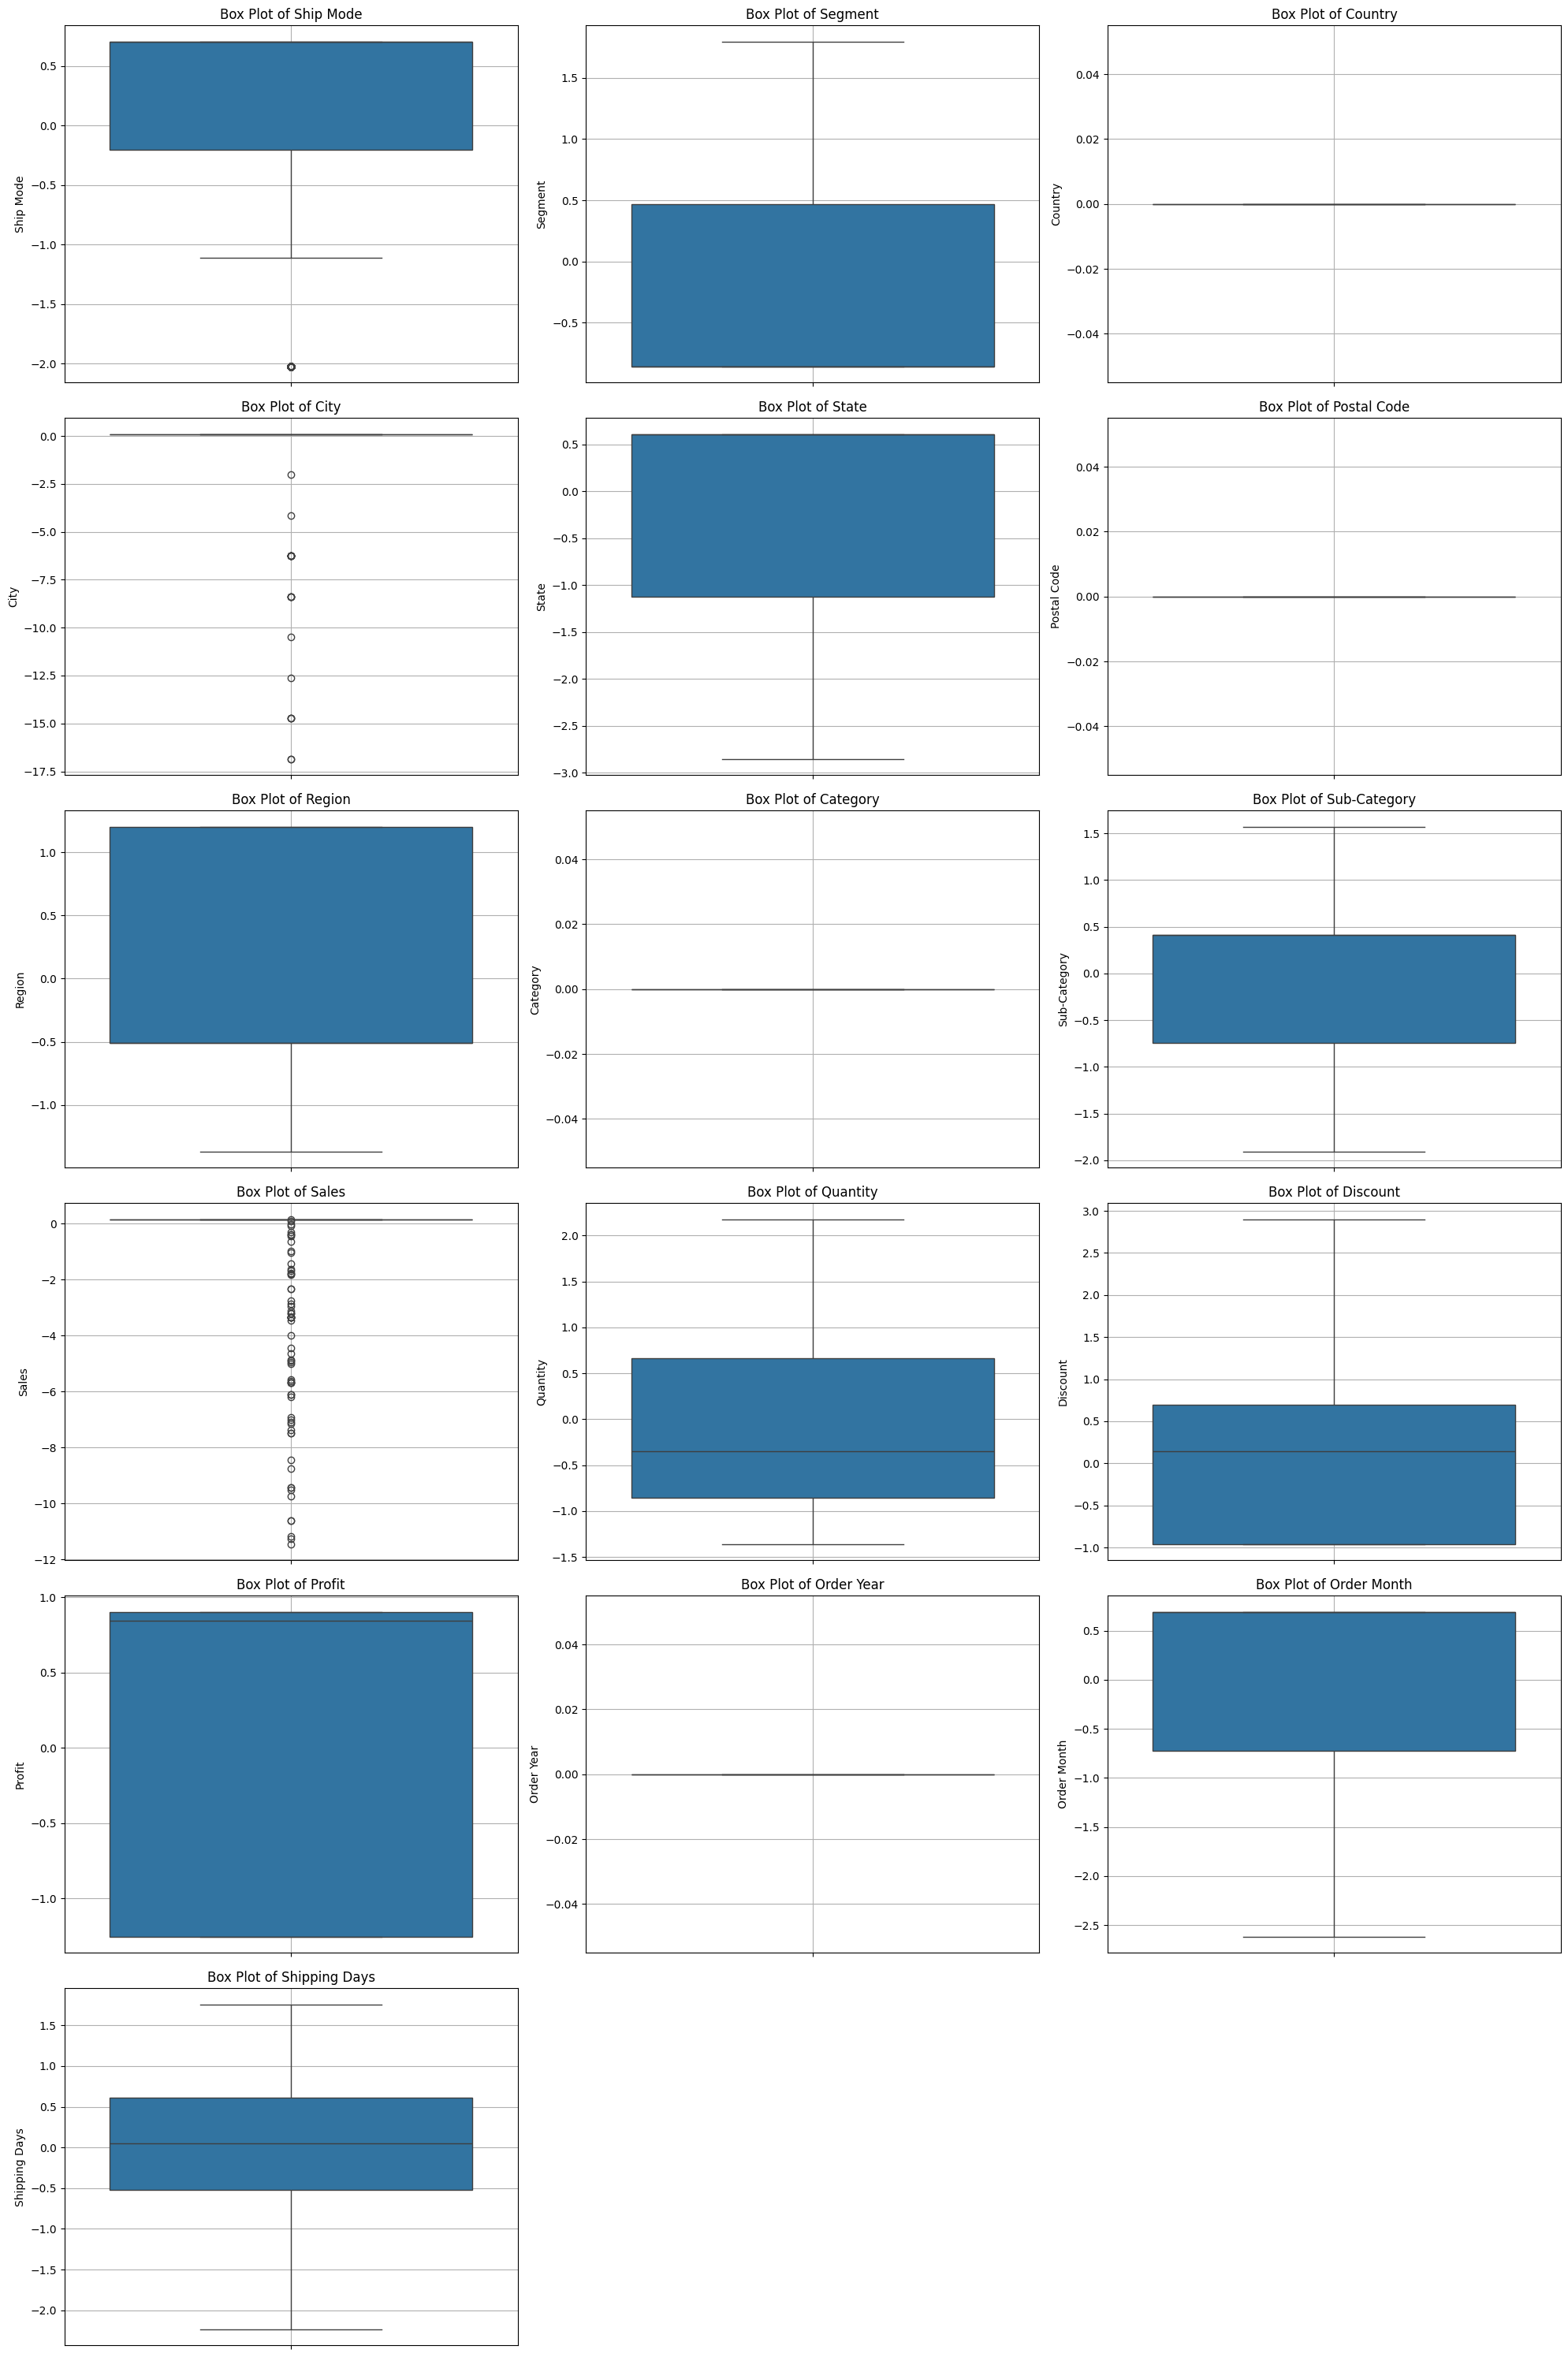

In [54]:
#Box Plot
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {col}')
    axes[idx].set_xlabel('')
    axes[idx].grid(True)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [55]:
#Get the Outliers using IQR
outliers = {}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = len(outlier_rows)

# Show columns with outliers
for col, count in outliers.items():
        print(f'{col}: {count} outliers')


Ship Mode: 327 outliers
Segment: 0 outliers
Country: 0 outliers
City: 21 outliers
State: 0 outliers
Postal Code: 0 outliers
Region: 0 outliers
Category: 0 outliers
Sub-Category: 0 outliers
Sales: 65 outliers
Quantity: 0 outliers
Discount: 0 outliers
Profit: 0 outliers
Order Year: 0 outliers
Order Month: 0 outliers
Shipping Days: 0 outliers


In [56]:
#Function to handel the outler using IQR
def handle_outliers(df, column):
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [57]:
#Apply the function on the used data
for col in df.columns:
    df = handle_outliers(df, col)

In [58]:
# Display outliers after handling
outliers_after = {}
for col in df.columns:
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_after[col] = len(outlier_rows)

for col, count in outliers_after.items():
    print(f'{col}: {count} outliers')

Ship Mode: 0 outliers
Segment: 0 outliers
Country: 0 outliers
City: 0 outliers
State: 0 outliers
Postal Code: 0 outliers
Region: 0 outliers
Category: 0 outliers
Sub-Category: 0 outliers
Sales: 0 outliers
Quantity: 0 outliers
Discount: 0 outliers
Profit: 0 outliers
Order Year: 0 outliers
Order Month: 0 outliers
Shipping Days: 0 outliers


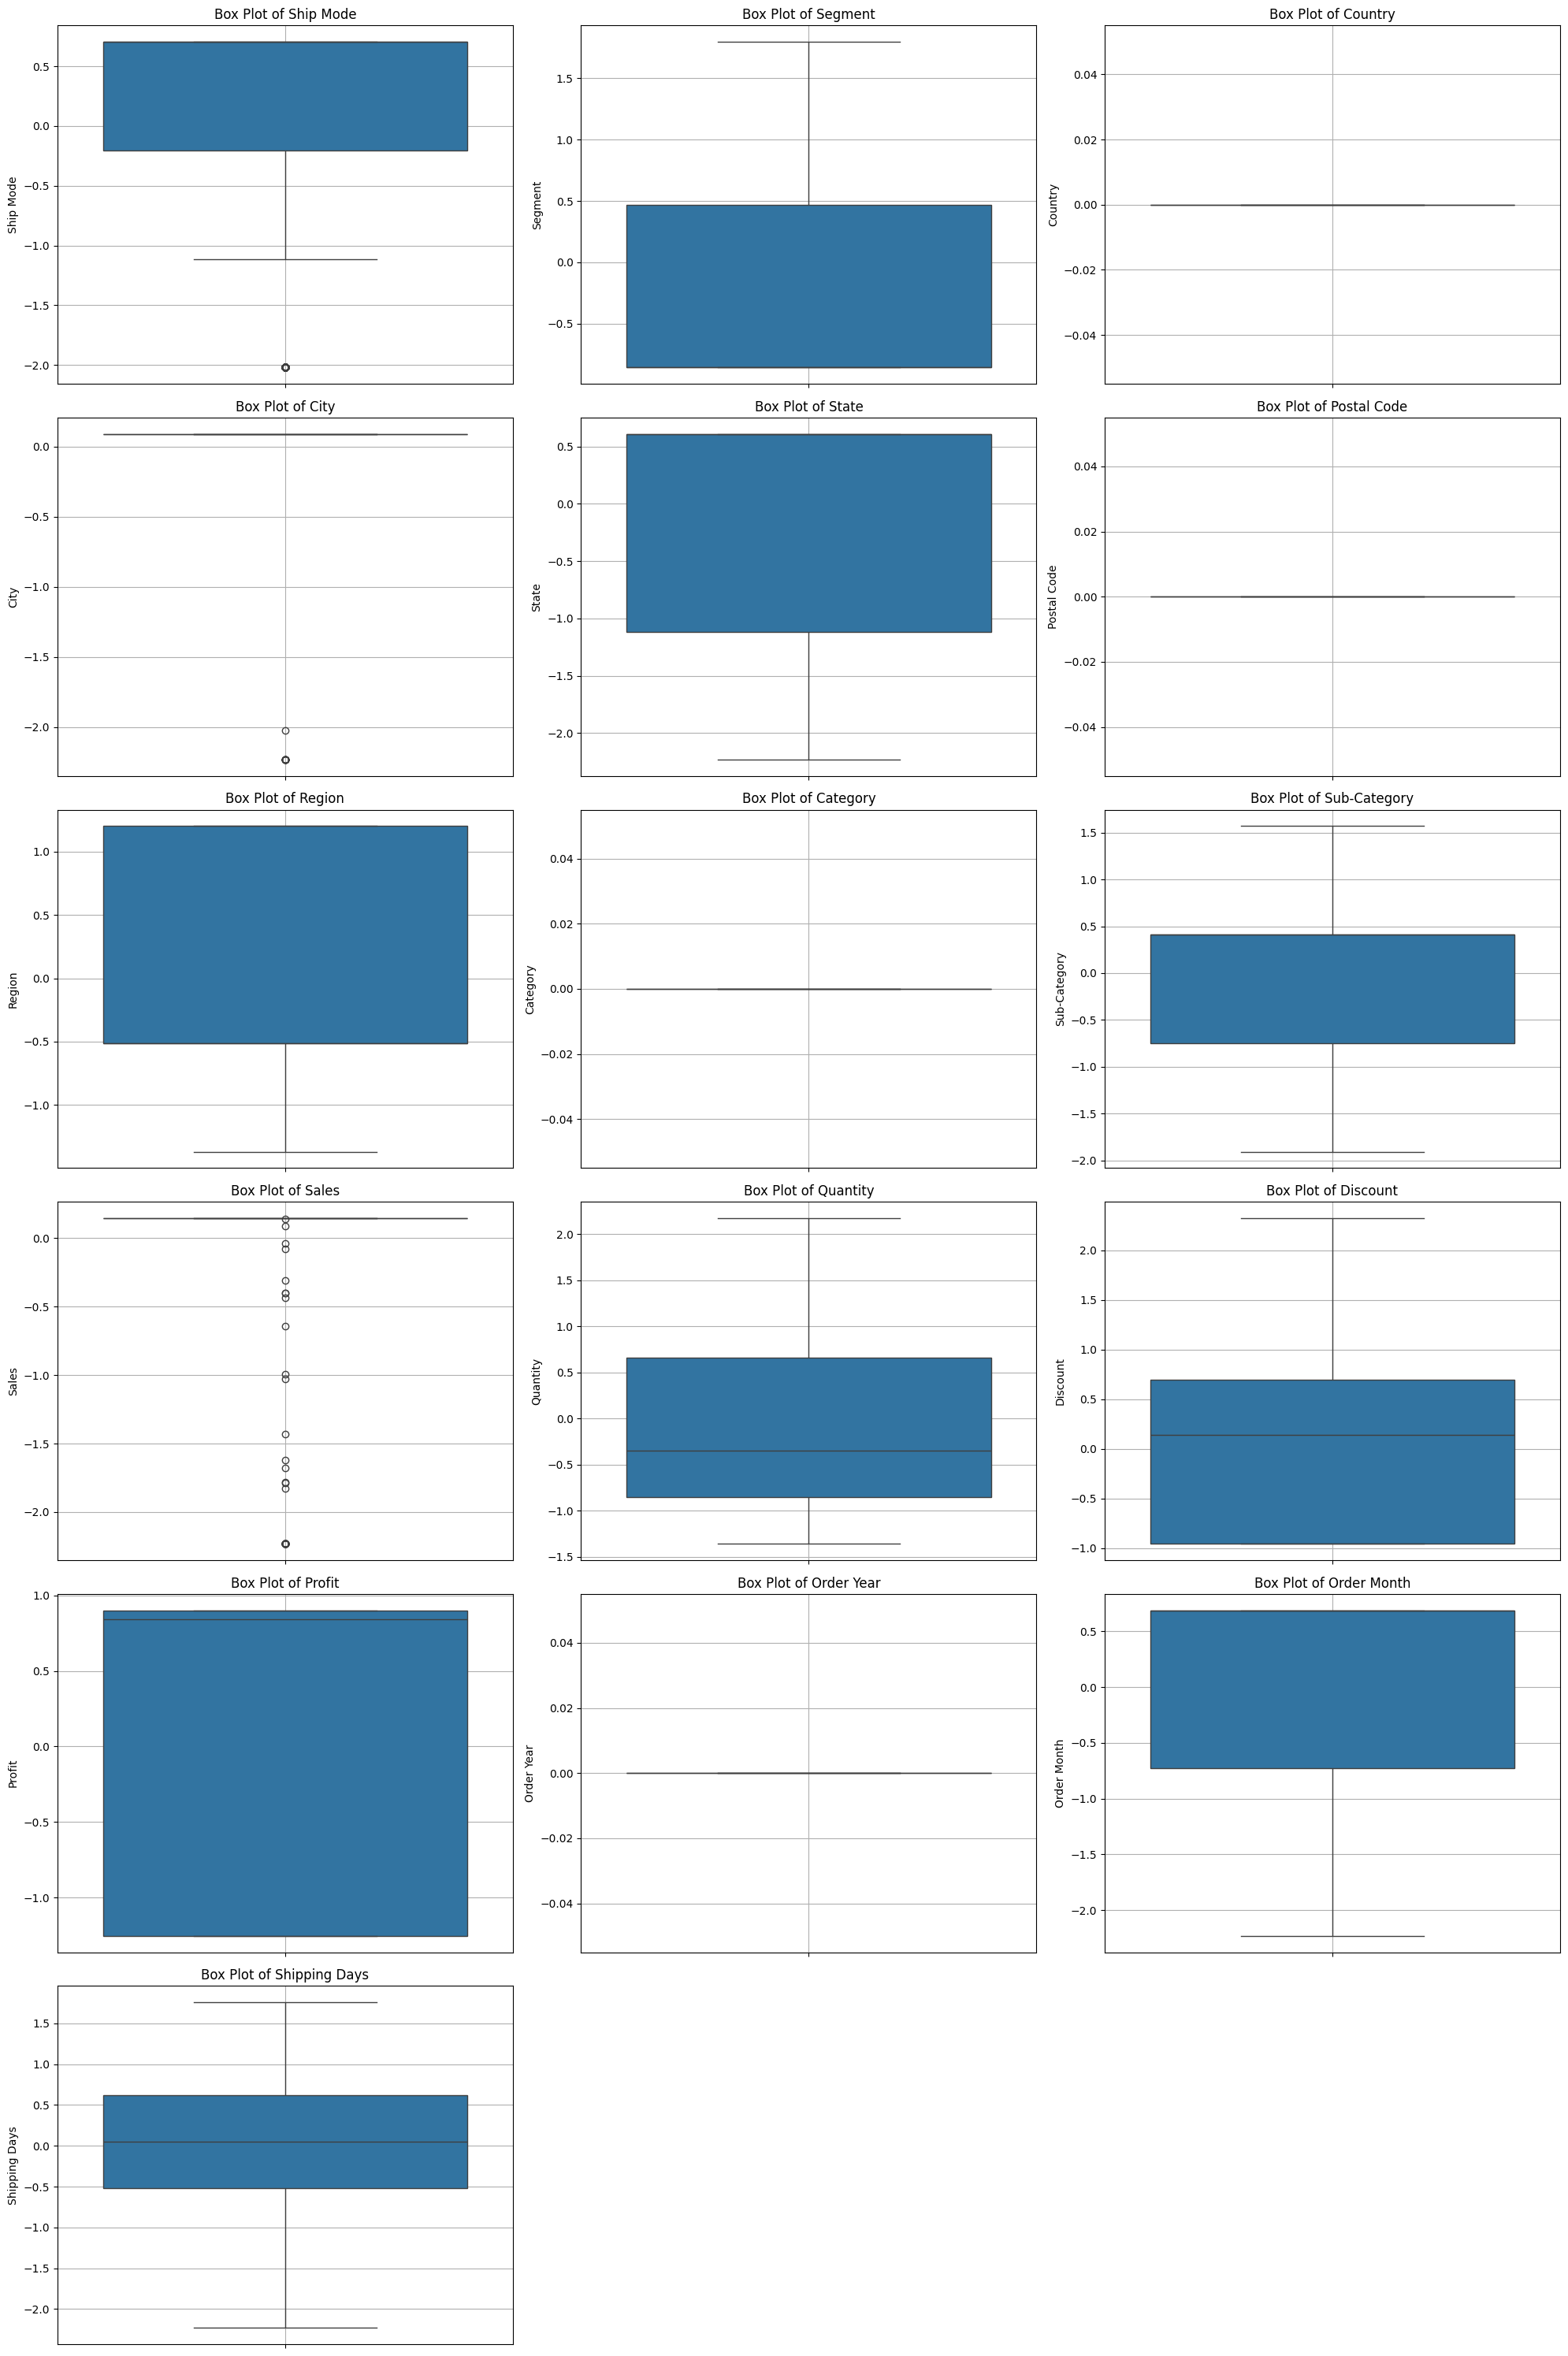

In [59]:
#Box Plot after handel outliers
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {col}')
    axes[idx].set_xlabel('')
    axes[idx].grid(True)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**1- Distribution of Sales**

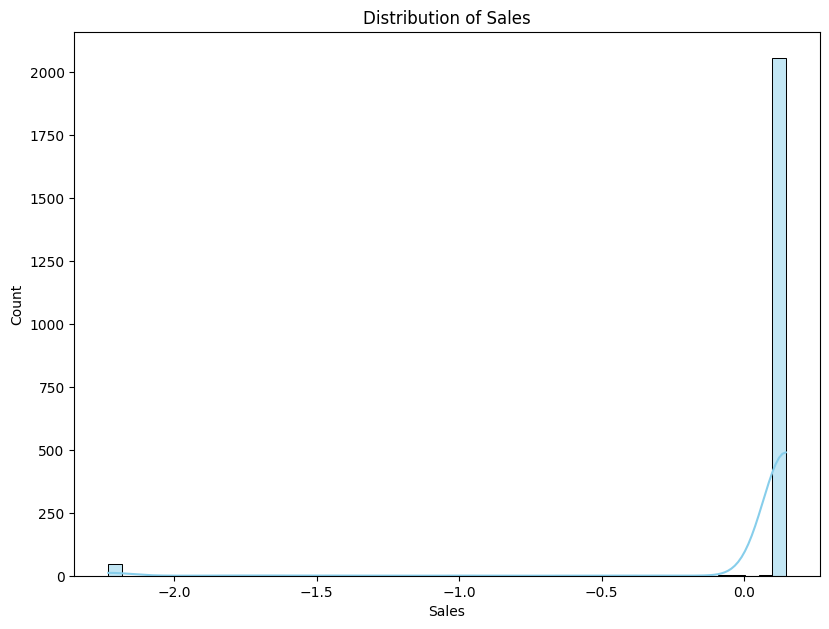

In [60]:
# 1. Distribution of Sales
plt.figure(figsize=(16, 18))
plt.subplot(3, 2, 1)
sns.histplot(df['Sales'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.tight_layout()
plt.show()

**2-  Distribution of Profit**

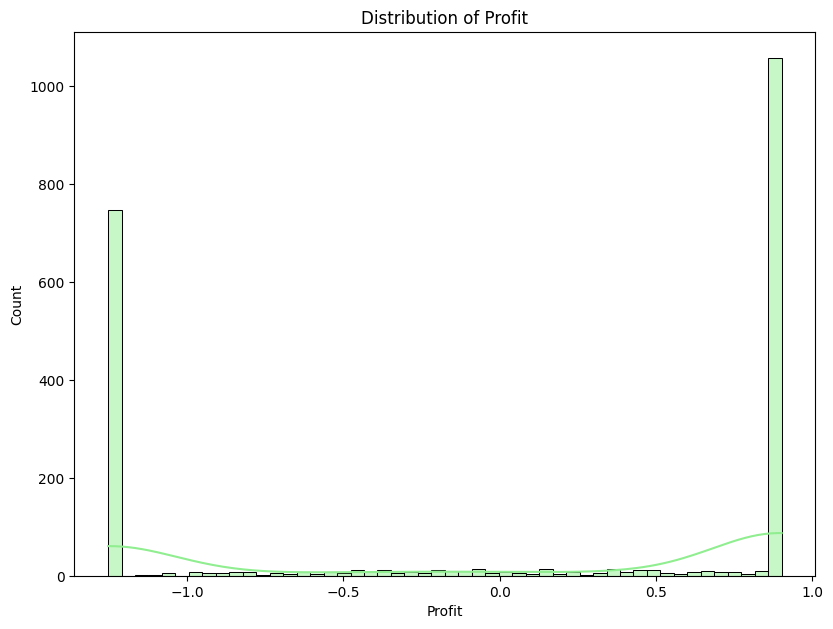

In [61]:
# 2. Distribution of Profit
plt.figure(figsize=(16, 18))
plt.subplot(3, 2, 2)
sns.histplot(df['Profit'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Profit')
plt.tight_layout()
plt.show()

**3- Profit by Category**

<ipython-input-62-ce912569ddc9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Profit', data=df, palette='Set2')


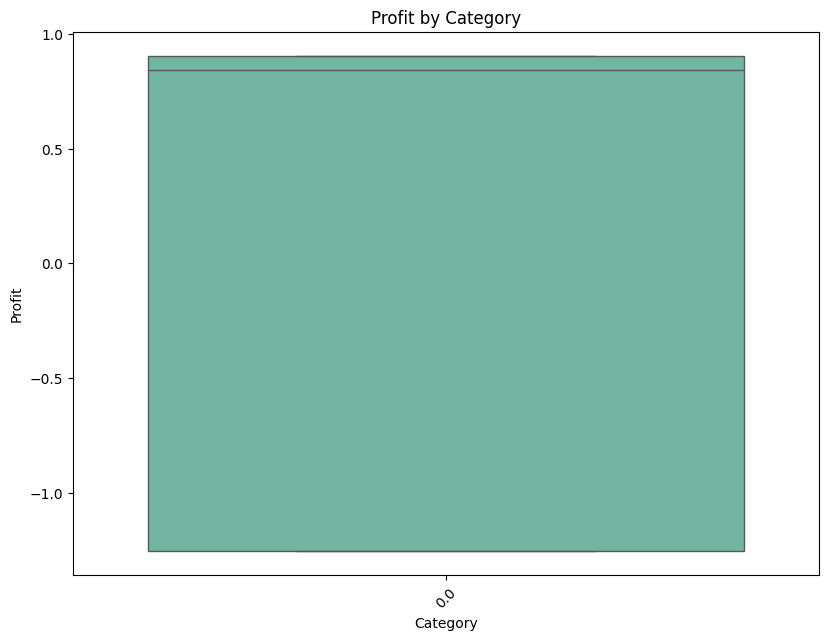

In [62]:
# 3. Profit by Category
plt.figure(figsize=(16, 18))
plt.subplot(3, 2, 3)
sns.boxplot(x='Category', y='Profit', data=df, palette='Set2')
plt.title('Profit by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4- Correlation Heatmap**

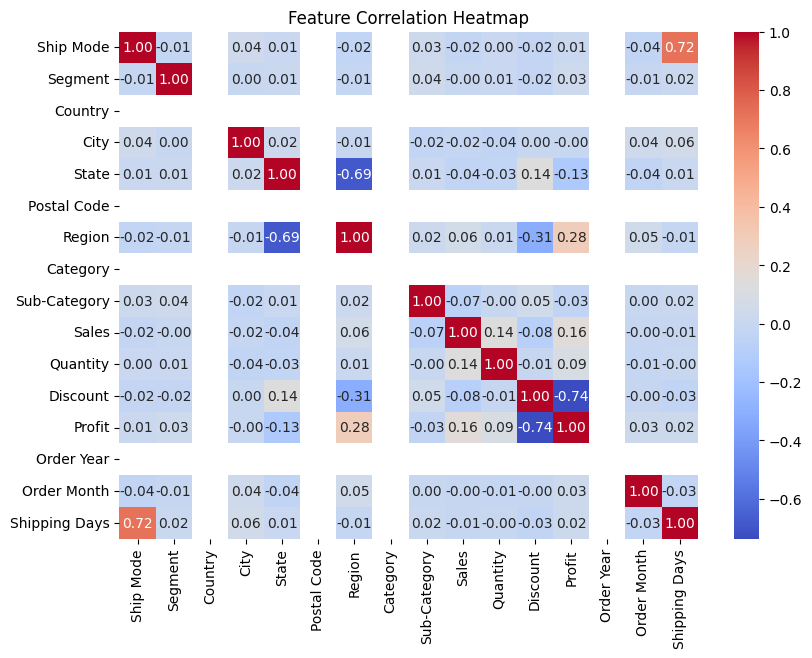

In [63]:
# 4. Correlation Heatmap
plt.figure(figsize=(16, 18))
plt.subplot(3, 2, 4)
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

**5- Sales by Order Month**

<ipython-input-64-9dd8c0529e33>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Order Month', y='Sales', data=df, palette='Set3')


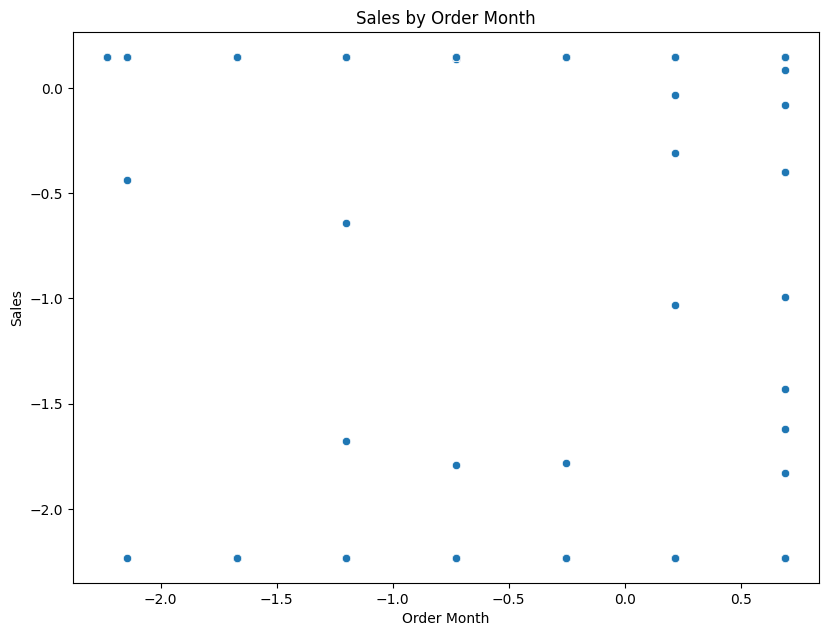

In [64]:
# 5. Sales by Order Month
plt.figure(figsize=(16, 18))
plt.subplot(3, 2, 5)
sns.scatterplot(x='Order Month', y='Sales', data=df, palette='Set3')
plt.title('Sales by Order Month')
plt.tight_layout()
plt.show()

**6- Profit vs Discount**

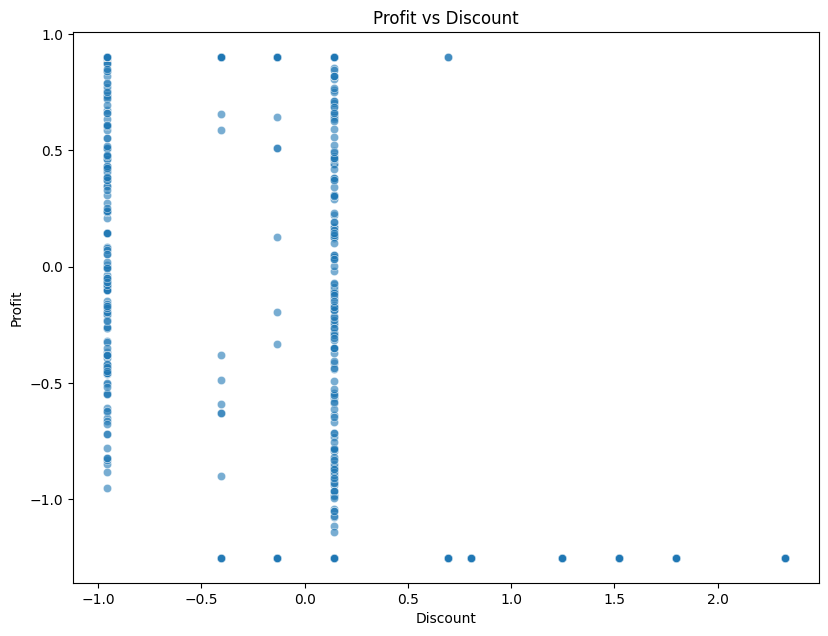

In [65]:
# 6. Profit vs Discount Scatterplot
plt.figure(figsize=(16, 18))
plt.subplot(3, 2, 6)
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.6)
plt.title('Profit vs Discount')
plt.tight_layout()
plt.show()

**3- Feature Selection:-**

**- Feature Selection with SelectKBest**

In [66]:
X = df.drop(columns=['Sales'])
y = df['Sales']

fsf_selector = SelectKBest(score_func=f_regression, k=5)
X_new_fsf = fsf_selector.fit_transform(X, y)

selected_fsf_features = X.columns[fsf_selector.get_support()]
print("Top 5 Features Selected using SelectKBest:", selected_fsf_features.tolist())


Top 5 Features Selected using SelectKBest: ['Region', 'Sub-Category', 'Quantity', 'Discount', 'Profit']


**- Top 5 Features Selected Based on F-Scores**

<ipython-input-67-efc138567fe1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-Score', y='Feature', data=top_features, palette='viridis')


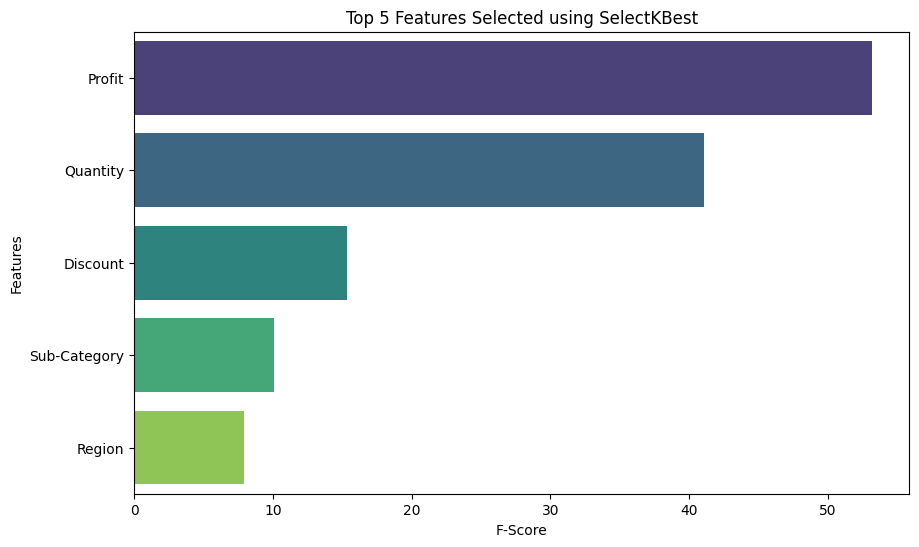

In [67]:
f_scores, p_values = f_regression(X, y)

feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores})
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)

top_features = feature_scores.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='F-Score', y='Feature', data=top_features, palette='viridis')
plt.title('Top 5 Features Selected using SelectKBest')
plt.xlabel('F-Score')
plt.ylabel('Features')
plt.show()

**- Top 5 Features Selected Using Recursive Feature Elimination (RFE)**

In [68]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rfe_selector = RFE(rf_model, n_features_to_select=5)
rfe_selector.fit(X, y)

selected_rfe_features = X.columns[rfe_selector.support_]
print("Top 5 Features Selected using RFE:", selected_rfe_features.tolist())


Top 5 Features Selected using RFE: ['Quantity', 'Discount', 'Profit', 'Order Month', 'Shipping Days']


**- Feature Rankings Using Recursive Feature Elimination (RFE) with Random Forest**

<ipython-input-69-2706bcaf09c1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ranking', y='Feature', data=rfe_ranking, palette='coolwarm')


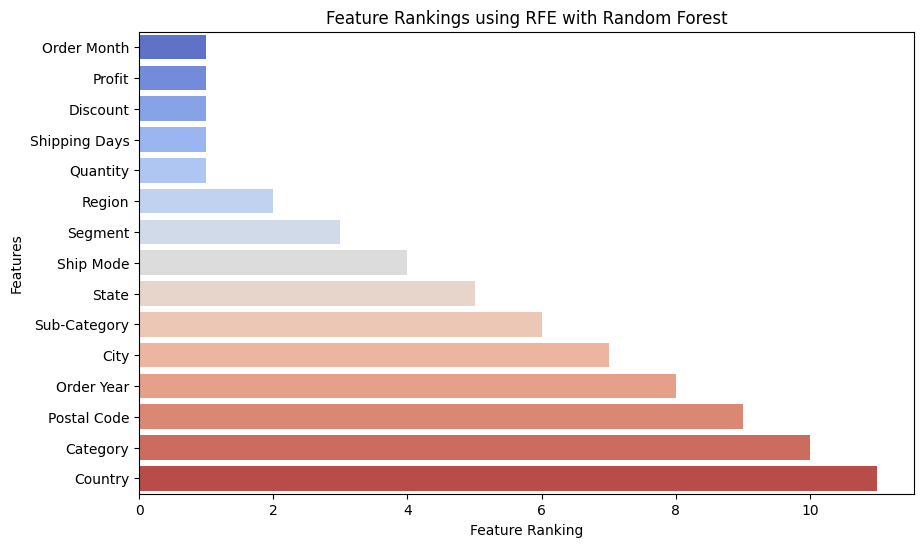

In [69]:
rfe_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe_selector.ranking_})

rfe_ranking = rfe_ranking.sort_values(by='Ranking')

plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=rfe_ranking, palette='coolwarm')
plt.title('Feature Rankings using RFE with Random Forest')
plt.xlabel('Feature Ranking')
plt.ylabel('Features')
plt.show()

**- Variance Inflation Factor (VIF) Calculation**

In [70]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["features"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_data = calculate_vif(X)
print("VIF for each feature:")
print(vif_data)

high_vif_features = vif_data[vif_data["VIF"] > 5]
print("Features with high VIF (> 5):", high_vif_features)


VIF for each feature:
         features       VIF
0       Ship Mode  2.078313
1         Segment  1.004674
2         Country       NaN
3            City  1.007655
4           State  1.925303
5     Postal Code       NaN
6          Region  2.108129
7        Category       NaN
8    Sub-Category  1.007766
9        Quantity  1.019948
10       Discount  2.272307
11         Profit  2.239161
12     Order Year       NaN
13    Order Month  1.007363
14  Shipping Days  2.078252
Features with high VIF (> 5): Empty DataFrame
Columns: [features, VIF]
Index: []


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


<ipython-input-71-38a4055ff091>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='features', data=vif_data, palette='viridis')


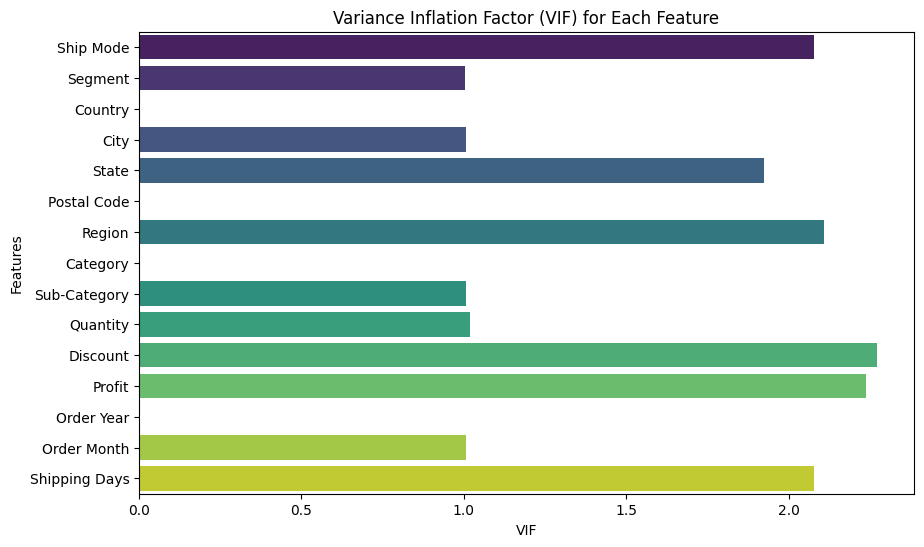

Features with high VIF (> 5):
Empty DataFrame
Columns: [features, VIF]
Index: []


In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='features', data=vif_data, palette='viridis')
plt.title('Variance Inflation Factor (VIF) for Each Feature')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.show()

print("Features with high VIF (> 5):")
print(high_vif_features)

**4- Feature engineering:-**

**- Feature Engineering for Predictive Modeling**

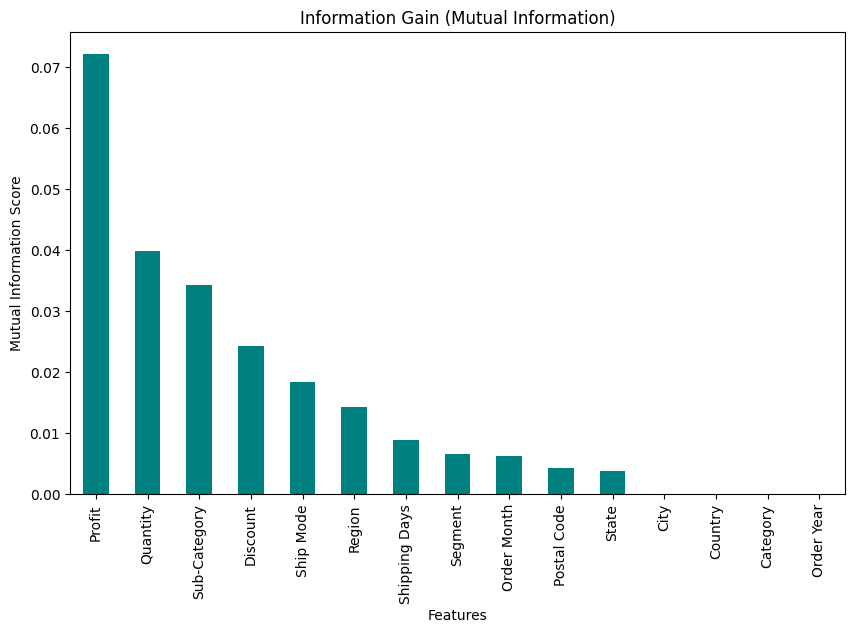

In [72]:
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
mi_scores.plot(kind="bar", color="teal")
plt.title("Information Gain (Mutual Information)")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.show()

**- Feature Selection with Variance Threshold**

In [73]:
variance_threshold = VarianceThreshold(threshold=0.1)
X_variance_selected = variance_threshold.fit_transform(X)

selected_features = variance_threshold.get_support(indices=True)
print("Selected Features (Variance Threshold):", X.columns[selected_features])

Selected Features (Variance Threshold): Index(['Ship Mode', 'Segment', 'State', 'Region', 'Sub-Category', 'Quantity',
       'Discount', 'Profit', 'Order Month', 'Shipping Days'],
      dtype='object')


**- Feature Selection with Fisher's Score**

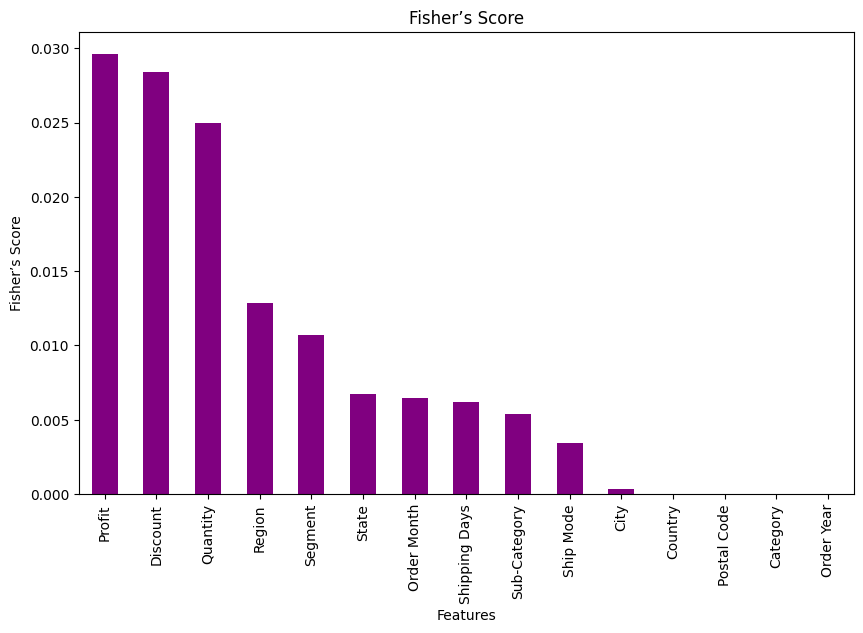

In [74]:
def fisher_score(X, y):
    classes = np.unique(y)
    overall_mean = np.mean(X, axis=0)
    between_var = np.zeros(X.shape[1])
    within_var = np.zeros(X.shape[1])

    for c in classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]

        between_var += n_c * (mean_c - overall_mean) ** 2
        within_var += np.sum((X_c - mean_c) ** 2, axis=0)

    fisher_scores = between_var / within_var
    return fisher_scores

fisher_scores = fisher_score(X, y)
fisher_scores = pd.Series(fisher_scores, index=X.columns)
fisher_scores.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
fisher_scores.plot(kind="bar", color="purple")
plt.title("Fisher’s Score")
plt.xlabel("Features")
plt.ylabel("Fisher’s Score")
plt.show()


**- Correlation Coefficient with Target**

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


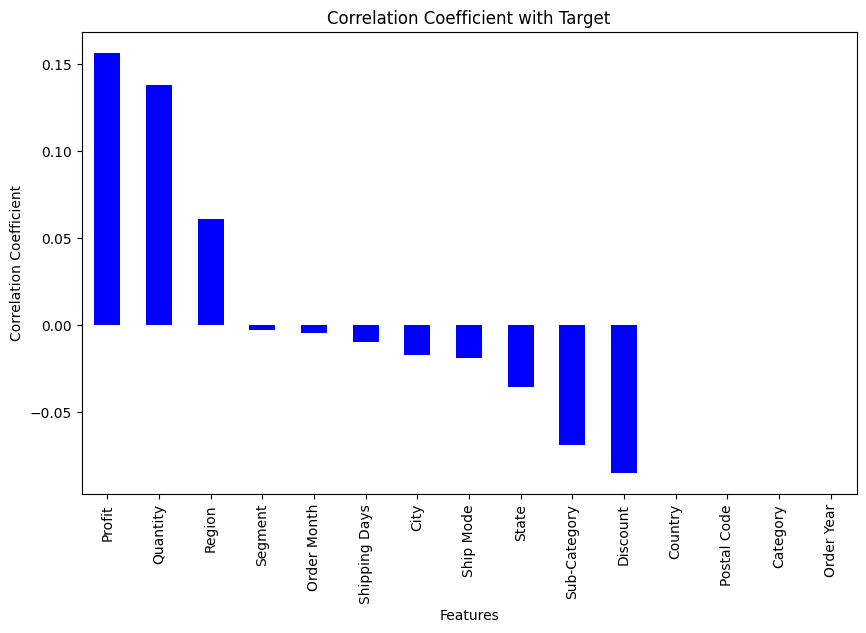

In [75]:
corr_scores = np.corrcoef(X.T, y)[-1, :-1]
corr_scores = pd.Series(corr_scores, index=X.columns)
corr_scores.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
corr_scores.plot(kind="bar", color="blue")
plt.title("Correlation Coefficient with Target")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

In [76]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Year,Order Month,Shipping Days
0,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-1.905541,0.146435,-0.852755,-0.957784,0.901562,0.0,0.690145,-0.522427
1,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-0.747025,0.146435,-0.348194,-0.957784,0.901562,0.0,0.690145,-0.522427
2,0.705444,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,1.570008,0.146435,0.660927,1.521192,-1.252827,0.0,0.690145,1.756472
3,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,0.146435,1.670048,-0.957784,0.901562,0.0,-0.254709,0.617023
4,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,1.570008,0.146435,2.174609,0.143983,0.901562,0.0,-0.254709,0.617023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,-2.020330,1.795219,0.0,0.090866,0.609512,0.0,-1.368451,0.0,-1.905541,0.146435,0.156366,0.805043,-1.252827,0.0,-1.671990,-0.522427
2116,-0.203147,0.470057,0.0,0.090866,-0.255681,0.0,-0.511400,0.0,0.411492,0.146435,-1.357316,-0.957784,0.479302,0.0,0.690145,0.617023
2117,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,1.570008,0.146435,-1.357316,-0.957784,0.901562,0.0,0.690145,-0.522427
2118,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,0.411492,0.146435,-0.348194,0.143983,-0.147948,0.0,-2.231602,-1.092152


# **Save The Cleaned Data**

In [77]:
df.to_csv('Super_Store_Data_After_EDA.csv',index = True)

In [78]:
new_df = pd.read_csv("/content/Super_Store_Data_After_EDA.csv")
new_df

,Unnamed: 0,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Year,Order Month,Shipping Days
0,0,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-1.905541,0.146435,-0.852755,-0.957784,0.901562,0.0,0.690145,-0.522427
1,1,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-0.747025,0.146435,-0.348194,-0.957784,0.901562,0.0,0.690145,-0.522427
2,2,0.705444,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,1.570008,0.146435,0.660927,1.521192,-1.252827,0.0,0.690145,1.756472
3,3,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,0.146435,1.670048,-0.957784,0.901562,0.0,-0.254709,0.617023
4,4,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,1.570008,0.146435,2.174609,0.143983,0.901562,0.0,-0.254709,0.617023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2115,-2.020330,1.795219,0.0,0.090866,0.609512,0.0,-1.368451,0.0,-1.905541,0.146435,0.156366,0.805043,-1.252827,0.0,-1.671990,-0.522427
2116,2116,-0.203147,0.470057,0.0,0.090866,-0.255681,0.0,-0.511400,0.0,0.411492,0.146435,-1.357316,-0.957784,0.479302,0.0,0.690145,0.617023
2117,2117,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,1.570008,0.146435,-1.357316,-0.957784,0.901562,0.0,0.690145,-0.522427
2118,2118,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,0.411492,0.146435,-0.348194,0.143983,-0.147948,0.0,-2.231602,-1.092152
